In [1]:
!pip install pandas


In [2]:
import sklearn

In [3]:
import nltk

In [4]:
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

In [5]:
!pip install sklearn

In [6]:
from wordcloud import WordCloud,STOPWORDS

In [7]:
from sklearn.model_selection import train_test_split 

In [8]:
!pip install scipy

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [10]:
!pip install wordcloud

In [11]:
data = pd.read_csv("Sentiment.csv")
data

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0000,yes,1.0000,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0000,yes,1.0000,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0000,yes,1.0000,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona
5,6,Ted Cruz,0.6332,yes,1.0000,Positive,0.6332,None of the above,1.0000,NaN,...,NaN,228,NaN,NaN,"RT @GregAbbott_TX: @TedCruz: ""On my first day ...",NaN,2015-08-07 09:54:44 -0700,629697194283499520,NaN,Central Time (US & Canada)
6,7,No candidate mentioned,1.0000,yes,1.0000,Negative,0.6761,FOX News or Moderators,1.0000,NaN,...,NaN,17,NaN,NaN,RT @warriorwoman91: I liked her and was happy ...,NaN,2015-08-07 09:54:44 -0700,629697192383672320,North Georgia,Eastern Time (US & Canada)
7,8,No candidate mentioned,1.0000,yes,1.0000,Neutral,1.0000,None of the above,1.0000,NaN,...,NaN,0,NaN,NaN,Going on #MSNBC Live with @ThomasARoberts arou...,NaN,2015-08-07 09:54:44 -0700,629697192169750528,New York NY,Eastern Time (US & Canada)
8,9,Ben Carson,1.0000,yes,1.0000,Negative,0.6889,None of the above,0.6444,NaN,...,NaN,0,NaN,NaN,Deer in the headlights RT @lizzwinstead: Ben C...,NaN,2015-08-07 09:54:44 -0700,629697190219243524,NaN,Pacific Time (US & Canada)
9,10,No candidate mentioned,0.4594,yes,0.6778,Negative,0.6778,None of the above,0.4594,NaN,...,NaN,1,NaN,NaN,RT @NancyOsborne180: Last night's debate prove...,NaN,2015-08-07 09:54:42 -0700,629697185093824512,NaN,NaN


In [12]:
data = data[['text','sentiment']]

In [13]:
train, test = train_test_split(data,test_size = 0.1)
# Removing neutral sentiments
train = train[train.sentiment != "Neutral"]

In [14]:
train

,text,sentiment
12649,RT @RWSurferGirl: I think Cruz and Trump need ...,Positive
10112,RT @goldietaylor: Closing statements! #GOPDeba...,Negative
1909,"Based on his rhetoric, I assume when Donald Tr...",Negative
12854,#Rubio is the junior at the Dad's man cave. He...,Negative
6907,#Awkord is correct. What was that suppose to m...,Negative
12296,RT @RWSurferGirl: The candidates don't have to...,Negative
3037,"""Bring on @HillaryClinton because we need some...",Positive
2158,RT @GovMikeHuckabee: I pledge to oppose amnest...,Positive
973,"Moderator: ""@ScottWalker,when you 'rip up the ...",Negative
4515,RT @jncatron: The only candidate who stood out...,Negative


In [15]:
train, test = train_test_split(data,test_size = 0.1)
# Removing neutral sentiments
train

,text,sentiment
10830,RT @RWSurferGirl: The candidates don't have to...,Negative
2442,RT @RMConservative: If the media is fawning ov...,Negative
10208,"So according to Rubio God has ""blessed"" Republ...",Negative
12058,RT @RWSurferGirl: Why doesn't Chris Wallace as...,Negative
8184,"RT @Lrihendry: #TedCruz As President, I will a...",Positive
11208,I like Ted Cruz because he looks like Bill Mur...,Positive
1916,"RT @StudyingLiberty: Apparently Trump, the ""te...",Negative
11159,RT @RWSurferGirl: Fox News is obviously trying...,Negative
9291,RT @RWSurferGirl: It is very disappointing tha...,Negative
601,#Winning #CruzCrew 😎 Keep It Up! #TedCruz2016 ...,Positive


Positive words


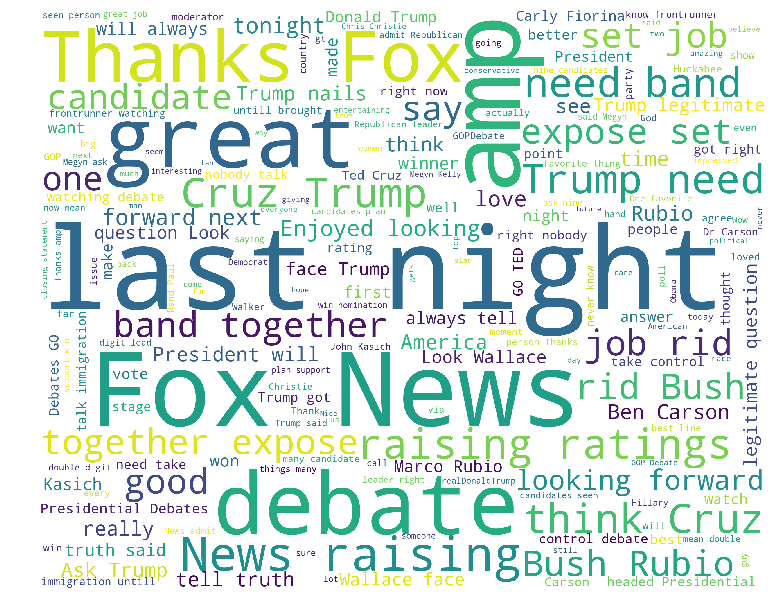

Negative words


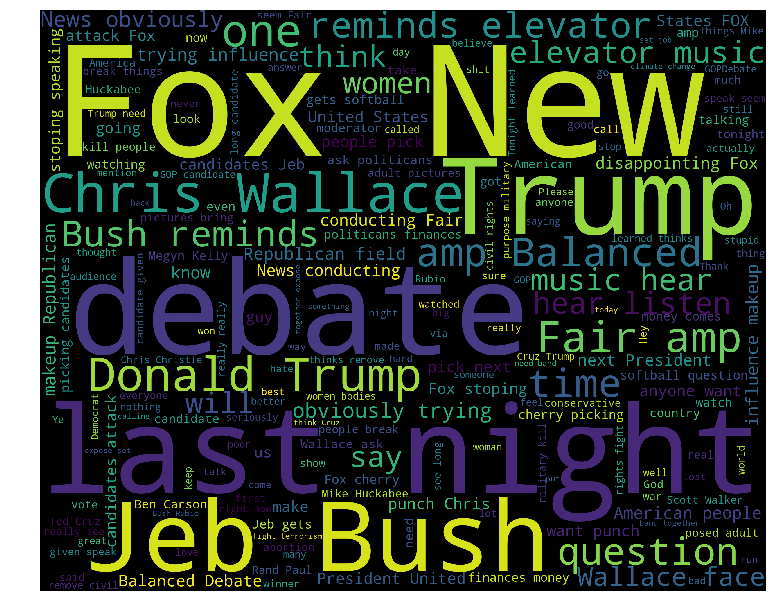

In [16]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)
